In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix #plots confusion matrix
from sklearn.metrics import plot_confusion_matrix #draws a confusion matrix
import shap
import os

# Parse doctor file
Parsed data stored into a dataframe. 
doctor_gender dictionary created to store gender of doctors.

In [29]:
doctor_gender = {}  # key: file name  value: male or female
female_dr_dark = os.listdir("./datasets/doctor_nurse/dr/fem_dr_dark_56")
doctor_gender.update(dict.fromkeys(female_dr_dark, "female"))
female_dr_light = os.listdir("./datasets/doctor_nurse/dr/fem_dr_light_256")
doctor_gender.update(dict.fromkeys(female_dr_light, "female"))

male_dr_dark = os.listdir("./datasets/doctor_nurse/dr/mal_dr_dark_62")
doctor_gender.update(dict.fromkeys(male_dr_dark, "male"))
male_dr_light = os.listdir("./datasets/doctor_nurse/dr/mal_dr_light_308")
doctor_gender.update(dict.fromkeys(male_dr_light, "male"))

In [30]:
os.listdir("./datasets/doctor_nurse/dr/")

['fem_dr_dark_56', 'mal_dr_dark_62', 'fem_dr_light_256', 'mal_dr_light_308']

In [31]:
index = 0
data = []  # stores the data which will be converted into a dataframe
full_file = open("labels_doctor.txt")
content = full_file.readlines()



with open("labels_doctor.txt") as file:
    for line in file:
        index += 1
        row = {}  # row dictionary will be addded to dataframe
        
        if line.find(".jpg") >= 0:
            nextLine = content[index-1]
            row["id"] = nextLine.strip()
            row["gender"] = doctor_gender[nextLine.strip()]
            
            nextLineIndex = 2
            # this will loop through next 10 lines
            for i in range(9):
                nextLine = content[index + nextLineIndex]
                nextLineIndex += 1
                split0 = nextLine.split(' ', 1)
                feature = split0[1].strip()
                split1 = feature.split('  ', 1)
                feature = split1[0].strip()
                value = split1[1].strip()
                # print(f"feature: {feature}, value: {value}")
                row[feature] = value
                
            # add row dictionary to data array
            data.append(row)
            
        # if not the line before feature data then continue to next line
        elif line.find("Label") == -1:  
            continue

        

dataFrame_doc = pd.DataFrame(data)

# Deleting 72 rows to have # of doctors = # of nurses
remove_n = 23
drop_indices = np.random.choice(dataFrame_doc.index, remove_n, replace=False)
dataFrame_doctor = dataFrame_doc.drop(drop_indices)

# inserting label column. 1 = doctor, 0 = nurse.
dataFrame_doctor.insert(0 ,"Label", 1)
pd.set_option('display.max_columns', 5)
print(dataFrame_doctor.head(10))
print(dataFrame_doctor.shape)
print(dataFrame_doctor.columns)

    Label                                                 id  ...  \
0       1        508. 168360297-56a46dc63df78cf7728260c0.jpg  ...   
1       1  45. muslim-female-doctor-in-hijab-with-stethos...  ...   
2       1  54. female-doctor-portrait-picture-id641923702...  ...   
3       1  439. whatadoctorlookslike-hashtag-tamika-cross...  ...   
5       1  176. female-dr-comforting-patient-article.__v9...  ...   
6       1  80. doctorimage_320x400_1a4d58a0295a2931ab2649...  ...   
8       1  377. female-doctor-talking-to-senior-couple_0.jpg  ...   
9       1  277. man-talking-to-woman-doctor-istock8666719...  ...   
10      1  283. 16-Surprising-Things-Doctors-Want-Women-t...  ...   
11      1  500. adorable-indian-female-doctor-nurse-steth...  ...   

   Television set Flat panel display  
0             NaN                NaN  
1             NaN                NaN  
2             NaN                NaN  
3             NaN                NaN  
5             NaN                NaN  
6     

# Parse nurse file
Parsed data stored into a dataframe

In [32]:
index = 0
data = []  # stores the data which will be converted into a dataframe
full_file = open("labels_nurse.txt")
content = full_file.readlines()

with open("labels_nurse.txt") as file:
    for line in file:
        index += 1
        row = {}  # row dictionary will be added to dataframe
        
        # fn = female nurse
        if line.find("fn") >= 0:
            nextLine = content[index-1]
            split = nextLine.split(' ', 1)
#             print(split[1])
            row["id"] = split[1].strip()
            row["gender"] = "female"
        
            nextLineIndex = 2
            # this will loop through next 10 lines
            for i in range(9):
                nextLine = content[index + nextLineIndex]
                nextLineIndex += 1
                split0 = nextLine.split(' ', 1)
                feature = split0[1].strip()
                split1 = feature.split('  ', 1)
                feature = split1[0].strip()
                value = split1[1].strip()
                # print(f"feature: {feature}, value: {value}")
                row[feature] = value
                
            # add row dictionary to data array
            data.append(row)
            
        # mn = male nurse
        elif line.find("mn") >= 0:
            nextLine = content[index-1]
            split = nextLine.split(' ', 1)
#             print(split[1])
            row["id"] = split[1].strip()
            row["gender"] = "male"
        
            nextLineIndex = 2
            # this will loop through next 10 lines
            for i in range(9):
                nextLine = content[index + nextLineIndex]
                nextLineIndex += 1
                split0 = nextLine.split(' ', 1)
                feature = split0[1].strip()
                split1 = feature.split('  ', 1)
                feature = split1[0].strip()
                value = split1[1].strip()
                row[feature] = value
    
            # add row dictionary to data array
            data.append(row)
        

dataFrame_nurse = pd.DataFrame(data)

# inserting label column. 1 = doctor, 0 = nurse.
dataFrame_nurse.insert(0 ,"Label", 0)
pd.set_option('display.max_columns', 5)
print(dataFrame_nurse.head(10))
print(dataFrame_nurse.shape)
print(dataFrame_nurse.columns)


   Label                                                 id  ...  \
0      0                           341. nurse_684816040.jpg  ...   
1      0            234. ANS-Clinical-Nurse-Hero-mobile.jpg  ...   
2      0  109. female-nurse-helping-to-a-girl-patient-to...  ...   
3      0               438. 3050196_female-black-nurse-.jpg  ...   
4      0      437. cb88ddac-42d1-4176-94b7-483ed2d8d189.jpg  ...   
5      0  159. 42307113-portrait-of-female-nurse-with-di...  ...   
6      0  534. bigstock-Boy-Talking-To-Female-Nurse-In-5...  ...   
7      0   310. MSHS-PalliativeCare-Carousel-1920x600-1.jpg  ...   
8      0                         550. about_with_header.jpg  ...   
9      0  303. UK-nhs-cervical-smear-transexual-678x381.jpg  ...   

  Computed tomography Jacket  
0                 NaN    NaN  
1                 NaN    NaN  
2                 NaN    NaN  
3                 NaN    NaN  
4                 NaN    NaN  
5                 NaN    NaN  
6                 NaN    NaN  
7  

# Dataframe processing
Concatenating the two dataframes, filling missing values with 0

In [33]:
dataFrame = pd.concat([dataFrame_doctor, dataFrame_nurse], ignore_index=True)

dataFrame = dataFrame.fillna(0)

# Sanitizing
Removing the labels that are unrelated...

In [53]:
my_file = open("datasets/sanitized.txt", "r")
contents = my_file.readlines()
my_file.close()

sanitized_all = [item.strip() for item in contents]
sanitized_all

['Hand',
 'Health care',
 'Stethoscope',
 'Sleeve',
 'Black hair',
 'Event',
 'Happy',
 'White coat',
 'Medical assistant',
 'Medical',
 'Nurse',
 'Coat',
 'Physician',
 'Skin',
 'Medical equipment',
 'Computer',
 'Desk',
 'Job',
 'Comfort',
 'White',
 'Collar',
 'Neck',
 'Scrubs',
 'Patient',
 'Joint',
 'Head',
 'Community',
 'Room',
 'Building',
 'Window',
 'Temple',
 'Plant',
 'Medical procedure',
 'Jaw',
 'Jacket',
 'Table',
 'Chair',
 'Human',
 'People',
 'Hospital bed',
 'Gas',
 'Hospital',
 'Employment',
 'Clock',
 'Mouth',
 'Microscope',
 'Laboratory',
 'Organ',
 'Travel',
 'Watch',
 'Hospital gown',
 'Art',
 'Furniture',
 'Vertebrate',
 'Surgeon',
 'Photograph',
 'Bag',
 'Team',
 'Youth',
 'Couch',
 'Mammal',
 'Door',
 'Podium',
 'Machine',
 'Space',
 'Fixture',
 'Sky',
 'Water',
 'Child',
 'Love',
 'Baby',
 'Handshake',
 'Calendar',
 'Wheel',
 'Tire',
 'Clinic',
 'Car',
 'Vehicle',
 'Hypodermic needle',
 'Red',
 'Bed',
 'Real estate',
 'Blond',
 'Flower',
 'Bottle',
 'Televis

In [40]:
import commonsense.conceptnet as kb
from commonsense.logical_classes import to_data_frame

cn = kb.ConceptNet()

def sanitize_labels(labels: list, domain: str, debug: bool = True) -> list:
    """
    Goes through a list of labels and sanitizes the ones that are unrelated
    """
    cn = kb.ConceptNet()
    sanitized_labels = []
    facts = cn.search_all(domain)
    two_hops = list(to_data_frame(facts)['subject'].unique()) + list(to_data_frame(facts)['object'].unique())
#     print("Length of two_hops list:", len(two_hops))
    for label in labels:
        if debug: print("Checking for %s" %label)
        if cn.has_any_edge(label, domain):
            if debug: print("  found a direct connection for %s" %label)
            sanitized_labels.append(label)
        else:  # try two hop 
            for one_hop in two_hops:
                if cn.has_any_edge(label, one_hop):  # This takes WAY too long to call.  
                    if debug: print("  found a connection for %s -> %s -> %s" %(label, one_hop, domain))
                    sanitized_labels.append(label)
                    break
    return sanitized_labels

# These are two examples that I'm looking at. 

# labels1 = ['Hand', 'Sleeve', 'Handwriting', 'Electric blue', 'Job', 'Gadget', 'Sitting', 
#           'Employment', 'Room', 'Fashion design', 'surgery']
# labels2 = ['Skin', 'Joing', 'Health care provider', 'Scrubs', 'Medical equipment', 
#            'Medical assistant', 'Medical procedure', 'Health care', 'Patient', 'Nurse']

# domain = 'hospital'
# sanitize_labels(labels1, domain)

In [35]:
domain = 'hospital'
all_labels = list(dataFrame.columns)[3::]
sanitized_labels = sanitize_labels(all_labels, domain)
drop_labels = [label for label in all_labels if label not in sanitized_labels] 
good_labels = ['Hand', 'Health care', 'Stethoscope', 'Sleeve', 'Black hair', 'Event', 'Happy', ]

Found a connection for Hand -> people -> hospital
Found a connection for Health care -> nosocomial -> hospital
Found a connection for Stethoscope -> doctor -> hospital
Found a connection for Sleeve -> straitjacket -> hospital
Found a connection for Black hair -> people -> hospital
Found a connection for Event -> operation -> hospital
Found a connection for Happy -> people -> hospital
Found a connection for White coat -> doctor -> hospital
Found a connection for Medical assistant -> doctor -> hospital
Found a direct connection for Medical
Found a direct connection for Nurse
Found a connection for Coat -> doctor -> hospital
Found a connection for Physician -> doctor -> hospital
Found a connection for Skin -> people -> hospital
Found a connection for Medical equipment -> doctor -> hospital
Found a connection for Computer -> operation -> hospital
Found a connection for Desk -> place -> hospital
Found a connection for Job -> doctor -> hospital
Found a connection for Comfort -> beds -> hospi

JSONDecodeError: [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<title>429 Too Many Requests</title>
<h1>Too Many Requests</h1>
<p>6000 per 1 hour</p>
: 0

In [41]:
new_start = all_labels.index('Hypodermic needle')
next_labels = all_labels[new_start::]
len(next_labels)

new_sanitized_labels = sanitize_labels(next_labels, domain)

Checking for Hypodermic needle
  round a connection for Hypodermic needle -> doctor -> hospital
Checking for Friendship
Checking for Croydon facelift
Checking for Orange
Checking for Beauty salon
Checking for Red
  found a direct connection for Red
Checking for Bed
  found a direct connection for Bed
Checking for Real estate
  round a connection for Real estate -> building -> hospital
Checking for Aircraft
Checking for Pattern
Checking for Pen
Checking for One-piece garment
Checking for Day dress
Checking for Overcoat
Checking for Blond
  round a connection for Blond -> people -> hospital
Checking for Vintage clothing
Checking for Flower
  round a connection for Flower -> beds -> hospital
Checking for Linens
Checking for Bedding
Checking for Pink
Checking for Mortarboard
Checking for Bottle
  round a connection for Bottle -> disinfectant -> hospital
Checking for Television
  round a connection for Television -> people -> hospital
Checking for Glass
Checking for Textile
Checking for Bac

KeyboardInterrupt: 

In [51]:
new2_start = all_labels.index('Cash')
next2_labels = all_labels[new2_start::]
len(next2_labels)

new_sanitized_labels2 = sanitize_labels(next2_labels, domain)

Checking for Cash
Checking for Currency
Checking for Money
  round a connection for Money -> doctor -> hospital
Checking for Composite material
Checking for Cuff
Checking for Computed tomography


In [52]:
len(next2_labels)

6

# SVM Classifier

In [7]:
# Google API uses nurse as feature for a few examples. Need to remove column for Nurse
dataFrame.drop('Nurse', axis = 1)
# store dataframe into x
x = dataFrame.copy() 
# y contains the labels of the dataframe
y = dataFrame['Label'].copy() 

# train test split. Need to store label gender and id of test set. Drop these columns after storing
# labeled data into x_test_labeled.
x_train, x_test_labeled, y_train, y_test = train_test_split(x, y, random_state = 30)
x_train = x_train.drop(['Label', 'gender', 'id'], axis = 1)
x_test = x_test_labeled.drop(['Label', 'gender', 'id'], axis = 1).copy() 

# print(x_train.head(10))
# print(x_test.head(10))
# print(x_test_labeled.head(10))

Accuracy = 75.76%


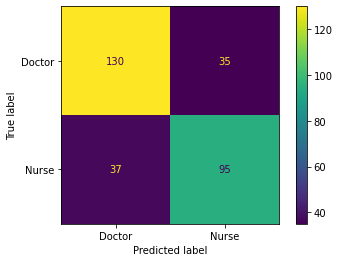

In [8]:
clf_svm = SVC(C = 10, gamma = 0.001, probability=True)
clf_svm.fit(x_train, y_train)

# confusion matrix of test data predictions
disp = plot_confusion_matrix(clf_svm, x_test, y_test, display_labels = ["Doctor", "Nurse"]) 



# accuracy
correct = disp.confusion_matrix[0,0] + disp.confusion_matrix[1,1]
accuracy = correct/(disp.confusion_matrix[0,0] + disp.confusion_matrix[0,1] + disp.confusion_matrix[1,0] + disp.confusion_matrix[1,1])
print(f"Accuracy = {accuracy*100:.2f}%")

In [9]:
# Code to confirm that the model is predicting 1 for Doctor and 0 for Nurse

# print(clf_svm.predict(x_test))
# print(clf_svm.predict_proba(x_test))
# print(x_test_labeled.iloc[5,:])
# x_test_labeled

# SHAP Explanations
For some reason higher SHAP values are for nurse even though nurse label = 0 and doctor label = 1

In [10]:
shap.initjs()

## Example 1

In [11]:
explainer = shap.KernelExplainer(clf_svm.predict_proba, x_train.iloc[5:10,:])
idx = 10
print(x_test.iloc[idx])
shap_values = explainer.shap_values(x_test.iloc[idx,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], x_test.iloc[idx,:])

Hand                   0
Health care            0
Research               0
Vision care            0
Stethoscope            0
                      ..
Currency               0
Money                  0
Composite material     0
Cuff                   0
Computed tomography    0
Name: 802, Length: 402, dtype: object


In [12]:
print(dataFrame["gender"].iloc[802])
print(dataFrame["id"].iloc[802])
print(dataFrame["Label"].iloc[802])

female
8. 800px_COLOURBOX3027525.jpg
0


## Example 2

In [13]:
idx = 2
print(x_test.iloc[idx])
shap_values = explainer.shap_values(x_test.iloc[idx,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], x_test.iloc[idx,:])

Hand                   0
Health care            0
Research               0
Vision care            0
Stethoscope            0
                      ..
Currency               0
Money                  0
Composite material     0
Cuff                   0
Computed tomography    0
Name: 613, Length: 402, dtype: object


In [14]:
print(dataFrame["gender"].iloc[613])
print(dataFrame["id"].iloc[613])
print(dataFrame["Label"].iloc[613])

female
198. 1140-nurse-wheelchair-home-care-health.imgcache.rev01e17c1f3a958cbd32e4c7ebbb936de0.jpg
0


## Example 3

In [15]:
idx = 5
print(x_test.iloc[idx])
shap_values = explainer.shap_values(x_test.iloc[idx,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], x_test.iloc[idx,:])

Hand                   0.959212
Health care                   0
Research                      0
Vision care                   0
Stethoscope                   0
                         ...   
Currency                      0
Money                         0
Composite material            0
Cuff                          0
Computed tomography           0
Name: 981, Length: 402, dtype: object


In [16]:
print(dataFrame["gender"].iloc[981])
print(dataFrame["id"].iloc[981])
print(dataFrame["Label"].iloc[981])

male
245. 103-Men-Ciel_800x.jpg
0


## Example 4

In [17]:
idx = 12
print(x_test.iloc[idx])
shap_values = explainer.shap_values(x_test.iloc[idx,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], x_test.iloc[idx,:])

Hand                          0
Health care            0.803126
Research                      0
Vision care                   0
Stethoscope            0.745305
                         ...   
Currency                      0
Money                         0
Composite material            0
Cuff                          0
Computed tomography           0
Name: 290, Length: 402, dtype: object


In [18]:
print(dataFrame["gender"].iloc[290])
print(dataFrame["id"].iloc[290])
print(dataFrame["Label"].iloc[290])

male
349. PCP-Expect-More-img.jpg
1


In [19]:
# print(dataFrame.loc[dataFrame['gender'] == "male"])

## Shapley values plot

In [20]:
# explain all the predictions in the test set. 
explainer = shap.KernelExplainer(clf_svm.predict_proba, x_train.iloc[0:1,:])
shap_values = explainer.shap_values(x_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], x_test)

  0%|          | 0/297 [00:00<?, ?it/s]

##### Waterfall plot giving errors

In [21]:
# shap.plots.waterfall(shap_values[0])
# shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], shap_values[0])
shap.waterfall_plot(explainer.expected_value[0], shap_values[0], x_test.iloc[idx,:])


AttributeError: 'numpy.float64' object has no attribute 'base_values'